# Dogs vs Cats Classification model

## Plot Dog and Cat photos

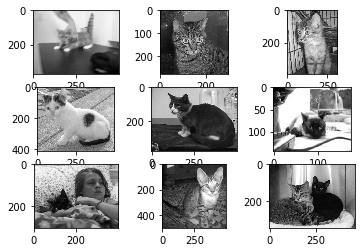

In [23]:
# plot dog photos from dogs vs cats dataset
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2

%matplotlib inline

# define the location of the dataset
folder = 'datasets/train/'
# plot the first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'cat.' + str(i) + '.jpg'
    # load image pixels
    # image = imread(filename)
    image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    # plot raw pixel data
    plt.imshow(image, cmap = 'gray')
# show the figure
plt.show()

In [24]:
# Plot of the first nine photos of cats in the dogs vs cat dataset

# Select Standardized Photo Size
The photos need to be reshaped prior to modelling so that all images have the same shape. This is often a small square image.

In [25]:
# load dogs vs cats dataset, reshape and save to a new file

from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

# define location of the dataset
folder = 'datasets/train/'
photos, labels = list(), list()

# enumerate the files in the directory

for file in listdir(folder):
    # determine class
    output = 0.0 # take output default as 0.0, which is dog
    # 1.0 will be the output if it's a cat
    if file.startswith('cat'):
        output = 1.0
    # load image
    photo = load_img(folder + file, target_size = (50,50))
    # convert to numpy array
    photo = img_to_array(photo)
    
    # store
    photos.append(photo)
    labels.append(output)
#convert to a numpy array
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)

# save the reshaped photos
save('dogs_vs_cats_photos.npy', photos)
save('dogs_vs_cats_labels.npy', labels)

(25000, 50, 50, 3) (25000,)


### At the end of the run, two files with the names ‘dogs_vs_cats_photos.npy‘ and ‘dogs_vs_cats_labels.npy‘ are created that contain all of the resized images and their associated class labels. files with the names 

In [8]:
# The prepared data can be loaded directly
# load and confirm the shape
from numpy import load

photos = load('dogs_vs_cats_photos.npy')
labels = load('dogs_vs_cats_labels.npy')
print(photos.shape, labels.shape)

(25000, 50, 50, 3) (25000,)


In [10]:
X_train = photos[:18000]
X_test = photos[18000:]

y_train = labels[:18000]
y_test = labels[18000:]

In [11]:
# one hot encoding the labels(y)

from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [20]:
# Develop a baseline CNN model

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()

model.add(Conv2D(64, kernel_size = (3,3),  activation = 'relu', input_shape = (50,50,3)))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

#compile model

from keras.optimizers import SGD
# opt = SGD(lr = 0.001, momentum = 0.9)

model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the model

In [21]:
model.fit(X_train, y_train, validation_data = (X_test, y_test),
         epochs = 3)

Train on 18000 samples, validate on 7000 samples
Epoch 1/3
18000/18000 [==============================] - 62s 3ms/step - loss: 7.7502 - accuracy: 0.4961 - val_loss: 7.5995 - val_accuracy: 0.5059
Epoch 2/3
18000/18000 [==============================] - 68s 4ms/step - loss: 7.7246 - accuracy: 0.4977 - val_loss: 7.5995 - val_accuracy: 0.5059
Epoch 3/3
18000/18000 [==============================] - 54s 3ms/step - loss: 7.7246 - accuracy: 0.4977 - val_loss: 7.5995 - val_accuracy: 0.5059
